## **STAT207 Final Project: An Analysis on Gender-Based Variations in Body Composition and Weight**


### Zoe Surles and Josh Weiner

### **1. Introduction**

#### **Motivation**

Imagine you work at a hospital as a data analyst. The hospital wants to make some predictions and do some analysis on how a patient's body dimensions, age, weight, and other factors are related. This could help with many areas such as keeping patients fit, predicting their height, or detecting obesity or being underweight.

#### **Research Questions**

**Set 1 (Linear Regression):**
- Is there a linear relationship between weight and chest girth, waist girth, thigh girth and bicep girth?
- What explanatory variables should we include in the model to build a parsimonious model?
- How do different body dimensions affect a person's weight?
- There are many groups of people that could be interested in this information, including the general public. People may want to know how their weight may be impacted by certain body dimensions in order to stay more fit.

**Set 2 (Logistic Regression):**
- Can we identify people whose sex is Female based on their body dimensions?
- How will this work on a new set of data?
- A clothing company may be interested in accurately predicting the sex of their customers based on their body dimensions in order to adjust their product to their customers.

**Set 3 (Inference):**
- What is the relationship between a person's sex and their height?
- What is the difference in mean height in Males and Females?
- Doctors who work with children may want to have a better idea of tall their patients may grow to based on the patient's sex.

#### **Limitations**

- One limitation of this data is that we do not have any sort of indication of the person's body fat percentage. There are people who may have a very low/high weight but still be incredibly fit. This data would not be useful for trying to analyze or predict how fit or healthy a person is. A good addition to this data set would be a variable such as muscular strength, endurance, flexibility, BMI, or some other indicator of fitness and body composition.

In [391]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.formula.api as smf
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [392]:
df = pd.read_csv("bdims.csv")
df

,biacromial_diameter,pelvic_breadth,bitrochanteric_diameter,chest_depth,chest_diameter,elbow_diameter,wrist_diameter,knee_diameter,ankle_diameter,shoulder_girth,...,forearm_girth,knee_diameter.1,calf_girth,ankle_girth,wrist_girth,age,weight,height,sex,age_group
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,Male,under_30
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,Male,under_30
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,Male,under_30
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,Male,under_30
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,Male,under_30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,38.0,30.4,32.9,17.0,27.1,12.9,10.4,19.5,14.4,108.4,...,25.4,37.7,37.9,22.4,15.4,29,71.8,176.5,Female,under_30
483,35.3,28.7,30.4,17.7,25.6,12.4,9.8,17.3,13.6,99.3,...,23.6,35.6,33.3,22.4,15.2,21,55.5,164.4,Female,under_30
484,34.7,24.9,24.7,17.3,24.2,12.0,10.2,18.0,13.6,91.9,...,24.0,34.4,34.1,21.2,15.5,33,48.6,160.7,Female,30-39
485,38.5,29.0,32.9,15.3,25.6,12.0,9.8,18.6,13.3,107.1,...,24.9,38.4,36.6,22.0,15.5,33,66.4,174.0,Female,30-39


### **2. Linear Regression and Feature Selection**

**Target question:** Is there a linear relationship between weight and chest girth, waist girth, thigh girth and bicep girth? What is the best parsimonous model that we can create?

In [393]:
df_model = smf.ols("weight~chest_girth+waist_girth+thigh_girth+bicep_girth", data=df).fit()
df_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     1248.
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          1.02e-252
Time:                        14:02:52   Log-Likelihood:                -1364.7
No. Observations:                 487   AIC:                             2739.
Df Residuals:                     482   BIC:                             2760.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -59.8066      2.810    -21.280      0.000     -65.329     -54.284
chest_girth     0.4352      0.056      7.722      0.000       0.324       0.546
waist_girth     0.4746      0.036     13.029      0.000       0.403       0.546
thigh_girth     0.6217      0.046     13.613      0.000       0.532       0.711
bicep_girth     0.5249      0.106      4.950      0.000       0.317       0.733
==============================================================================
Omnibus:                        2.518   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                2.311
Skew:                           0.128   Prob(JB):                        0.315
Kurtosis:                       3.220   Cond. No.                     2.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Equation**

y^ = -59.8066 + (0.4352 * chest_girt) + (0.4746 * waist_girth) + (0.6217 * thigh_girth) + (0.5249 * bicep_girth)

In [394]:
df.corr()

/var/folders/kv/b7ycyzg17v3f_grsjzhtpwt80000gn/T/ipykernel_30278/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,biacromial_diameter,pelvic_breadth,bitrochanteric_diameter,chest_depth,chest_diameter,elbow_diameter,wrist_diameter,knee_diameter,ankle_diameter,shoulder_girth,...,thigh_girth,bicep_girth,forearm_girth,knee_diameter.1,calf_girth,ankle_girth,wrist_girth,age,weight,height
biacromial_diameter,1.000000,0.305439,0.478991,0.595259,0.767379,0.759201,0.721012,0.629122,0.664099,0.797126,...,0.128136,0.694897,0.750362,0.503843,0.511426,0.613256,0.768034,0.127482,0.730665,0.752094
pelvic_breadth,0.305439,1.000000,0.664972,0.359394,0.327230,0.315217,0.278801,0.429077,0.359157,0.277132,...,0.413800,0.300902,0.291357,0.473769,0.402618,0.333123,0.264413,0.260076,0.491463,0.373432
bitrochanteric_diameter,0.478991,0.664972,1.000000,0.473542,0.522631,0.516909,0.467175,0.599750,0.486669,0.478042,...,0.538535,0.478361,0.476573,0.624521,0.592681,0.537458,0.477728,0.292090,0.663062,0.475991
chest_depth,0.595259,0.359394,0.473542,1.000000,0.677200,0.672554,0.612982,0.554167,0.602497,0.744992,...,0.360838,0.739288,0.724152,0.564972,0.559231,0.592017,0.687374,0.329104,0.805016,0.553633
chest_diameter,0.767379,0.327230,0.522631,0.677200,1.000000,0.760543,0.735268,0.661371,0.673635,0.873814,...,0.319757,0.795001,0.808522,0.596441,0.602275,0.642699,0.763010,0.220695,0.835249,0.627734
elbow_diameter,0.759201,0.315217,0.516909,0.672554,0.760543,1.000000,0.839271,0.725836,0.824558,0.820916,...,0.212836,0.807862,0.859180,0.585244,0.578516,0.665621,0.844850,0.229134,0.803470,0.735508
wrist_diameter,0.721012,0.278801,0.467175,0.612982,0.735268,0.839271,1.000000,0.710181,0.781646,0.778892,...,0.202742,0.766139,0.817730,0.579832,0.586016,0.664345,0.862502,0.232545,0.769362,0.679421
knee_diameter,0.629122,0.429077,0.599750,0.554167,0.661371,0.725836,0.710181,1.000000,0.723949,0.683610,...,0.441810,0.684134,0.720528,0.732791,0.688467,0.654953,0.726988,0.197667,0.766770,0.583565
ankle_diameter,0.664099,0.359157,0.486669,0.602497,0.673635,0.824558,0.781646,0.723949,1.000000,0.696539,...,0.189285,0.691088,0.738909,0.538469,0.541975,0.678177,0.768441,0.254765,0.726708,0.687057
shoulder_girth,0.797126,0.277132,0.478042,0.744992,0.873814,0.820916,0.778892,0.683610,0.696539,1.000000,...,0.325738,0.898165,0.897607,0.624278,0.625929,0.684066,0.843963,0.197145,0.880768,0.668551


There is multicollinearity between many of the variables. In order to get an accurate model that accounts for multicollinearity as well as reducing overfitting, we will create a LASSO model.

In [395]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1000)

In [396]:
X_train = df_train[["biacromial_diameter","pelvic_breadth","bitrochanteric_diameter","chest_depth","chest_diameter","elbow_diameter","wrist_diameter","knee_diameter","ankle_diameter","shoulder_girth","chest_girth","waist_girth","navel_girth","hip_girth","thigh_girth","bicep_girth","forearm_girth","knee_diameter","calf_girth","ankle_girth","wrist_girth","age","height"]]
y_train = df_train[["weight"]]

In [397]:
from sklearn.preprocessing import StandardScaler

#Create a StandardScaler() object and use it to 
scaler_training = StandardScaler()
scaled_expl_vars = scaler_training.fit_transform(X_train)

#Put this numpy array scaled output back into a dataframe with the same columns
X_train_scaled = pd.DataFrame(scaled_expl_vars, columns=X_train.columns)
X_train_scaled.head()

,biacromial_diameter,pelvic_breadth,bitrochanteric_diameter,chest_depth,chest_diameter,elbow_diameter,wrist_diameter,knee_diameter,ankle_diameter,shoulder_girth,...,hip_girth,thigh_girth,bicep_girth,forearm_girth,knee_diameter,calf_girth,ankle_girth,wrist_girth,age,height
0,0.949269,0.292951,0.725792,0.213745,0.554388,0.865686,0.017225,0.463834,1.153575,0.688620,...,0.563351,0.202885,0.718032,0.843023,0.463834,1.234636,1.590468,0.705986,0.692289,1.014755
1,-1.240249,-0.332701,-0.226107,-0.066211,-1.087115,-0.672663,-0.739278,-0.551455,-0.020934,-0.759914,...,-0.156143,0.509805,-0.463001,-0.351771,-0.551455,0.371456,-0.131164,-1.256684,0.901536,-1.400657
2,0.584349,0.337641,-0.273702,0.253739,-0.102213,0.426158,-0.415063,0.898958,-0.334136,0.055486,...,-0.559060,-0.367109,0.056653,0.140203,0.898958,0.578619,0.286201,0.124454,0.796913,0.612187
3,-0.676283,0.024815,-0.083322,0.053770,-1.087115,-0.745918,-1.063494,-0.116331,-0.647339,-1.028516,...,0.405062,1.014030,-0.699208,-0.632899,-0.116331,0.233347,0.442713,-0.747844,-0.563191,-1.453627
4,-0.344537,-0.556148,-0.987626,-0.746103,-0.831770,-0.379644,-0.523135,-1.276661,-0.647339,-0.424161,...,-1.580741,-2.186706,-0.108691,-0.351771,-1.276661,-1.907340,-1.644114,-0.747844,-0.667815,-0.701459


After scaling the data, we will use kFold to find the best alpha value for our LASSO model.

In [398]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cross_val = KFold(n_splits=10, shuffle=True, random_state=1000)
cross_val

KFold(n_splits=10, random_state=1000, shuffle=True)

In [399]:
from sklearn.linear_model import LinearRegression
lin_reg_mod = LinearRegression()
from sklearn.model_selection import cross_val_score

test_fold_r2 = cross_val_score(lin_reg_mod, X_train_scaled, y_train, cv=cross_val, scoring="r2")
print('Test Fold R^2 Values:', test_fold_r2)
print('Mean Test Fold R^2:', test_fold_r2.mean())
print('Std Test Fold R^2:', test_fold_r2.std())

Test Fold R^2 Values: [0.97598386 0.95854695 0.97085321 0.97383157 0.98393106 0.96994727
 0.97072782 0.98111241 0.96544748 0.9809838 ]
Mean Test Fold R^2: 0.9731365422850343
Std Test Fold R^2: 0.007372047300962252


In [400]:
from sklearn.linear_model import Lasso

for i in range(1,50):
    lin_reg_pcr = Lasso(alpha=(4/50)*i, max_iter=1000)
    test_fold_r2 = cross_val_score(lin_reg_pcr, X_train_scaled.iloc[:, 0:i], y_train, cv=cross_val, scoring = 'r2')
    print("alpha =", i*(4/50))
    print('Mean Test Fold R^2:', test_fold_r2.mean())
    print("-------")

alpha = 0.08
Mean Test Fold R^2: 0.5049944959895906
-------
alpha = 0.16
Mean Test Fold R^2: 0.5860512449229607
-------
alpha = 0.24
Mean Test Fold R^2: 0.6456009691984492
-------
alpha = 0.32
Mean Test Fold R^2: 0.7913768022759987
-------
alpha = 0.4
Mean Test Fold R^2: 0.8435176521532413
-------
alpha = 0.48
Mean Test Fold R^2: 0.8554841974379398
-------
alpha = 0.56
Mean Test Fold R^2: 0.861594336035906
-------
alpha = 0.64
Mean Test Fold R^2: 0.8693699881160185
-------
alpha = 0.72
Mean Test Fold R^2: 0.868443955749861
-------
alpha = 0.8
Mean Test Fold R^2: 0.8938735089634046
-------
alpha = 0.88
Mean Test Fold R^2: 0.903836877166445
-------
alpha = 0.96
Mean Test Fold R^2: 0.9173427158820179
-------
alpha = 1.04
Mean Test Fold R^2: 0.9166813050794888
-------


alpha = 1.12
Mean Test Fold R^2: 0.9323981463441623
-------
alpha = 1.2
Mean Test Fold R^2: 0.9329242364171693
-------
alpha = 1.28
Mean Test Fold R^2: 0.9300892842409307
-------
alpha = 1.36
Mean Test Fold R^2: 0.9296021582154351
-------
alpha = 1.44
Mean Test Fold R^2: 0.927650175744874
-------
alpha = 1.52
Mean Test Fold R^2: 0.9295715126526958
-------
alpha = 1.6
Mean Test Fold R^2: 0.9276334106719817
-------
alpha = 1.68
Mean Test Fold R^2: 0.9254697959132508
-------
alpha = 1.76
Mean Test Fold R^2: 0.9232261229178439
-------
alpha = 1.84
Mean Test Fold R^2: 0.9375735485229594
-------
alpha = 1.92
Mean Test Fold R^2: 0.9348620186421879
-------
alpha = 2.0
Mean Test Fold R^2: 0.9320339083854761
-------
alpha = 2.08
Mean Test Fold R^2: 0.9290890055820518
-------
alpha = 2.16
Mean Test Fold R^2: 0.9260238625222073
-------
alpha = 2.24
Mean Test Fold R^2: 0.9228387454962623
-------
alpha = 2.32
Mean Test Fold R^2: 0.9195322773916162
-------
alpha = 2.4
Mean Test Fold R^2: 0.9161073786

The highest r^2 is with alpha = 1.84, so we will now do LASSO with alpha = 1.84

In [401]:
lin_reg_pcr = Lasso(alpha=1.84, max_iter=1000)
test_fold_r2 = cross_val_score(lin_reg_pcr, X_train_scaled.iloc[:, 0:i], y_train, cv=cross_val, scoring = 'r2')
print('Mean Test Fold R^2:', test_fold_r2)

Mean Test Fold R^2: [0.93663892 0.92598471 0.93446241 0.93689603 0.94377852 0.94639989
 0.91674935 0.95982607 0.92955538 0.9454442 ]


In [402]:
from sklearn.linear_model import Lasso
lasso_mod_5 = Lasso(alpha=1.84, max_iter=1000)
lasso_mod_5.fit(X_train_scaled, y_train)
df_slopes = pd.DataFrame({'lasso_mod_05': lasso_mod_5.coef_.T}, index=X_train_scaled.columns)
df_slopes

,lasso_mod_05
biacromial_diameter,0.000000
pelvic_breadth,0.000000
bitrochanteric_diameter,0.000000
chest_depth,0.000000
chest_diameter,0.000000
elbow_diameter,0.000000
wrist_diameter,0.000000
knee_diameter,0.155462
ankle_diameter,0.000000
shoulder_girth,1.072393


The variables that have slopes of zero are: biacromial_diameter, pelvic_breadth, bitrochanteric_diameter, chest_depth, chest_diameter, elbow_diameter, wrist_diameter, ankle_diameter, navel_girth, thigh_girth, bicep_girth, ankle_girth, wrist_girth, and age.

Because these slopes are zero, we will remove them from the model. Our new linear regression model will include the variables: knee_diameter, shoulder_girth, chest_girth, waist_girth, hip_girth, forearm_girth, knee_diameter, and calf_girth.

In [403]:
df_model = smf.ols("weight~knee_diameter + shoulder_girth + chest_girth + waist_girth + hip_girth + forearm_girth + knee_diameter + calf_girth", data=df).fit()
df_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1248.
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          7.03e-303
Time:                        14:02:53   Log-Likelihood:                -1236.5
No. Observations:                 487   AIC:                             2489.
Df Residuals:                     479   BIC:                             2522.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -89.8902      2.649    -33.929      0.000     -95.096     -84.684
knee_diameter      1.0114      0.168      6.017      0.000       0.681       1.342
shoulder_girth     0.1688      0.041      4.168      0.000       0.089       0.248
chest_girth        0.2086      0.049      4.247      0.000       0.112       0.305
waist_girth        0.3099      0.031     10.050      0.000       0.249       0.370
hip_girth          0.4095      0.034     12.154      0.000       0.343       0.476
forearm_girth      0.7371      0.132      5.580      0.000       0.478       0.997
calf_girth         0.5464      0.082      6.672      0.000       0.385       0.707
==============================================================================
Omnibus:                        9.590   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               11.124
Skew:                           0.239   Prob(JB):                      0.00384
Kurtosis:                       3.566   Cond. No.                     3.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**New equation:**

y^ = -89.8902 + (1.0114 * knee_diameter) + (0.1688 * shoulder_girth) + (0.2086 * chest_girth) + (0.3099 * waist_girth) + (0.4095 * hip_girth) + (0.7371 * forearm_girth) + (0.5464 * calf_girth)

**Slope interpretation**

For each increase in knee_diameter by 1 unit (eg. inch, cm, mm), on average, we estimate that the expected weight will increase by 1.0114 units (eg. inch, cm, mm), holding the shoulder girth, chest girth, waist girth, hip girth, forearm girth, and calf girth constant.

**Variability explained by this model**

Our R^2 value is 0.948, so 94.8% of the variation is explained by the regression line. This is very high, which is very good. This means that our model has a large proportion of the variability in the dependent variable that has been accounted for by the model.

**Prediction**

If knee_diameter = 20, shoulder_girth = 115, chest_girth = 85, waist_girth = 65, hip_girth = 90, forearm_girth = 25, and calf_girth = 35, what is the person's weight?

In [404]:
prediction = -89.8902 + (1.0114 * 20) + (0.1688 * 115) + (0.2086 * 85) + (0.3099 * 65) + (0.4095 * 90) + (0.7371 * 25) + (0.5464 * 35)
prediction

62.03080000000001

### **3. Logistic Regression and Classification**

In [405]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.20, random_state = 1000)

In [406]:
df_train['sex'] = df_train['sex'].replace({'Male': 1, 'Female': 0})
df_train["sex"]
print("Unique values in 'sex' column:", df_train['sex'].unique())

Unique values in 'sex' column: [1 0]


In [407]:
df_test['sex'] = df_test['sex'].replace({'Male': 1, 'Female': 0})
df_test["sex"]
print("Unique values in 'sex' column:", df_test['sex'].unique())

Unique values in 'sex' column: [1 0]


Here we changed the values of the "sex" column so male = 1, and female = 0 so we can create the logistical regression model.

In [408]:
mod1 = smf.logit("sex ~ chest_depth + chest_diameter + ankle_diameter + hip_girth", data=df_train).fit()
mod1.summary()

Optimization terminated successfully.
         Current function value: 0.179347
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    sex   No. Observations:                  389
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            4
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                  0.7394
Time:                        14:02:53   Log-Likelihood:                -69.766
converged:                       True   LL-Null:                       -267.68
Covariance Type:            nonrobust   LLR p-value:                 2.225e-84
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -30.6163      4.798     -6.381      0.000     -40.020     -21.213
chest_depth        0.5919      0.136      4.345      0.000       0.325       0.859
chest_diameter     0.9916      0.152      6.543      0.000       0.695       1.289
ankle_diameter     1.8625      0.322      5.785      0.000       1.231       2.494
hip_girth         -0.3573      0.054     -6.635      0.000      -0.463      -0.252
==================================================================================
"""

In [409]:
mod2 = smf.logit("sex ~ knee_diameter + shoulder_girth + chest_girth + waist_girth + hip_girth + forearm_girth + knee_diameter + calf_girth", data = df_train).fit()
mod2.summary()

Optimization terminated successfully.
         Current function value: 0.083712
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    sex   No. Observations:                  389
Model:                          Logit   Df Residuals:                      381
Method:                           MLE   Df Model:                            7
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                  0.8783
Time:                        14:02:53   Log-Likelihood:                -32.564
converged:                       True   LL-Null:                       -267.68
Covariance Type:            nonrobust   LLR p-value:                 2.011e-97
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -20.3618      6.972     -2.920      0.003     -34.027      -6.696
knee_diameter     -0.1395      0.371     -0.376      0.707      -0.867       0.588
shoulder_girth     0.3001      0.098      3.055      0.002       0.108       0.493
chest_girth       -0.0898      0.106     -0.848      0.396      -0.297       0.118
waist_girth        0.2116      0.080      2.640      0.008       0.055       0.369
hip_girth         -0.5090      0.089     -5.722      0.000      -0.683      -0.335
forearm_girth      1.6987      0.434      3.913      0.000       0.848       2.549
calf_girth        -0.3414      0.179     -1.911      0.056      -0.692       0.009
==================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [410]:
mod1.bic

169.34970579201502

In [411]:
mod2.bic

112.83686249237712

Because a smaller BIC is better, we will use the second model. These are the same variables we used in the linear regression model.

Text(0.5, 1.0, 'Deviance Residual vs. Fitted Values')

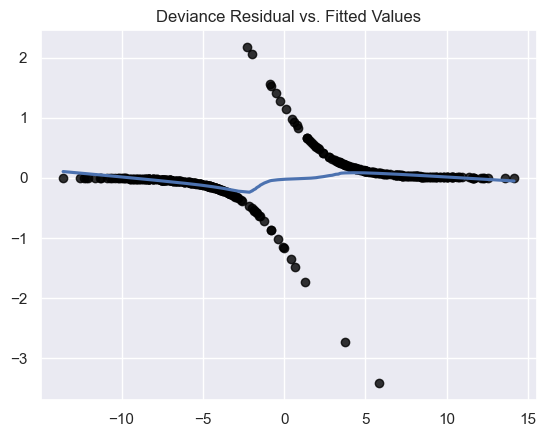

In [412]:
sns.regplot(x=mod2.fittedvalues, y= mod2.resid_dev, color="black", line_kws={"color":"b"}, lowess=True)
plt.title("Deviance Residual vs. Fitted Values")

Now that we created the model and can see that it is a good fit, we will create an ROC curve so we can determine the false positive and true positive rates.

Optimization terminated successfully.
         Current function value: 0.083712
         Iterations 10


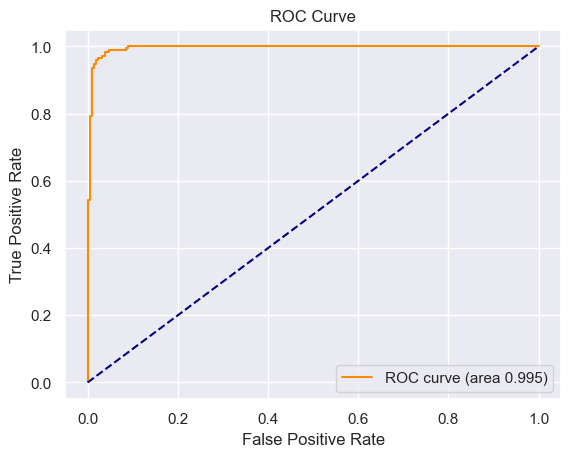

In [413]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import statsmodels.api as sm

def plot_roc(model, X, y, lw=2):
    predicted_probs = model.predict(sm.add_constant(X))

    fpr, tpr, thresholds = roc_curve(y, predicted_probs)
    auc = roc_auc_score(y, predicted_probs)

    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area ' + str(round(auc, 3)) + ')')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
mod = sm.Logit(df_train['sex'], sm.add_constant(df_train[['knee_diameter', 'shoulder_girth', 'chest_girth', 'waist_girth', 'hip_girth', 'forearm_girth', 'knee_diameter', 'calf_girth']])).fit()

plot_roc(mod, df_train[['knee_diameter', 'shoulder_girth', 'chest_girth', 'waist_girth', 'hip_girth', 'forearm_girth', 'knee_diameter', 'calf_girth']], df_train['sex'])

In [414]:
df_test["predictive_prob"] = mod2.predict(df_test)

fprs, tprs, thresholds = roc_curve(y_true = df_test['sex'], y_score = df_test['predictive_prob'])

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_true = df_test['sex'], y_score = df_test['predictive_prob'])
auc

1.0

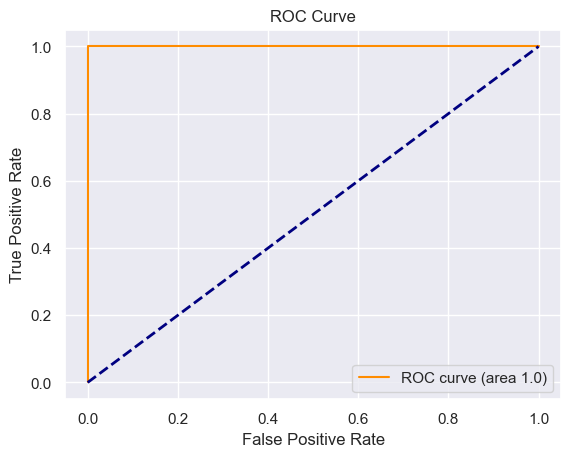

In [415]:
def plot_roc(fpr, tpr, auc, lw = 2):
    plt.plot(fpr, tpr, color = 'darkorange',
            label = 'ROC curve (area '+str(round(auc, 3))+')')
    plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc = 'lower right')
    plt.show()
plot_roc(fprs, tprs, auc)

In [416]:
import numpy as np
from sklearn.metrics import confusion_matrix
def fpr_tpr_thresh(y, pred_prob, thresh):
    yhat = 1 * (pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold': [thresh], 'fpr': [fpr], 'tpr': [tpr]})

mod1 = sm.Logit(df_train['sex'], sm.add_constant(df_train[['chest_depth', 'chest_diameter', 'ankle_diameter', 'hip_girth']])).fit()

for thresh in np.arange(0, 1.1, 0.1):
    print(fpr_tpr_thresh(df_train['sex'], mod1.predict(sm.add_constant(df_train[['chest_depth', 'chest_diameter', 'ankle_diameter', 'hip_girth']])), thresh))

print('')

for thresh in np.arange(0.1, 0.2, 0.01):
    print(fpr_tpr_thresh(df_train['sex'], mod1.predict(sm.add_constant(df_train[['chest_depth', 'chest_diameter', 'ankle_diameter', 'hip_girth']])), thresh))

Optimization terminated successfully.
         Current function value: 0.179347
         Iterations 9
   threshold  fpr  tpr
0        0.0  1.0  1.0
   threshold       fpr       tpr
0        0.1  0.224299  0.982857
   threshold       fpr   tpr
0        0.2  0.140187  0.96
   threshold       fpr       tpr
0        0.3  0.102804  0.948571
   threshold       fpr       tpr
0        0.4  0.084112  0.925714
   threshold       fpr       tpr
0        0.5  0.065421  0.914286
   threshold       fpr       tpr
0        0.6  0.051402  0.885714
   threshold      fpr       tpr
0        0.7  0.03271  0.851429
   threshold       fpr       tpr
0        0.8  0.023364  0.817143
   threshold       fpr       tpr
0        0.9  0.009346  0.782857
   threshold  fpr  tpr
0        1.0  0.0  0.0

   threshold       fpr       tpr
0        0.1  0.224299  0.982857
   threshold       fpr       tpr
0       0.11  0.200935  0.982857
   threshold       fpr       tpr
0       0.12  0.200935  0.982857
   threshold       fpr 

Using this, it seems like a threshold of .18 would be best since the true positive rate is very high still and we minimized the false positive rate.

In [417]:
df_train["predictive_prob"] = mod2.predict(df_train)
df_train['classifier_predictions'] = 1*(df_train['predictive_prob']>=0.18)
df_train

,biacromial_diameter,pelvic_breadth,bitrochanteric_diameter,chest_depth,chest_diameter,elbow_diameter,wrist_diameter,knee_diameter,ankle_diameter,shoulder_girth,...,calf_girth,ankle_girth,wrist_girth,age,weight,height,sex,age_group,predictive_prob,classifier_predictions
226,41.5,28.5,33.5,19.7,29.4,14.5,10.5,19.4,15.3,114.9,...,39.6,25.2,17.0,37,83.2,180.3,1,30-39,0.973158,1
276,34.9,27.1,31.5,19.0,24.9,12.4,9.8,18.0,13.8,99.8,...,37.1,21.9,14.3,39,59.8,157.5,0,30-39,0.008172,0
75,40.4,28.6,31.4,19.8,27.6,13.9,10.1,20.0,13.4,108.3,...,37.7,22.7,16.2,38,68.4,176.5,1,30-39,0.818864,1
230,36.6,27.9,31.8,19.3,24.9,12.3,9.5,18.6,13.0,97.0,...,36.7,23.0,15.0,25,63.0,157.0,0,under_30,0.000547,0
34,37.6,26.6,29.9,17.3,25.6,12.8,10.0,17.0,13.0,103.3,...,30.5,19.0,15.0,24,55.2,164.1,1,under_30,0.980198,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,37.5,29.2,35.1,19.6,27.5,13.1,10.2,20.0,13.1,101.5,...,40.0,23.0,16.0,22,72.8,170.2,0,under_30,0.002337,0
192,42.5,29.4,34.4,19.9,34.0,14.5,11.0,21.3,14.4,124.5,...,43.6,26.9,17.0,30,91.1,175.3,1,30-39,0.976660,1
71,42.0,27.6,32.2,19.7,29.4,13.9,10.0,18.7,13.8,113.0,...,37.8,20.3,16.5,44,73.4,174.0,1,40 and above,0.998163,1
87,41.7,28.0,32.9,19.4,29.7,14.6,11.0,19.5,15.3,112.8,...,37.3,23.1,16.7,23,72.7,170.2,1,under_30,0.999310,1


In [418]:
confusion_matrix = pd.crosstab(index=df_train["sex"] , columns=df_train["classifier_predictions"])
confusion_matrix

classifier_predictions,0,1
sex,,
0,202,12
1,2,173


In [419]:
accuracy = (202+173)/(202+173+12+2)
accuracy

0.9640102827763496

In [420]:
sensitivity = 173/(173+2)
sensitivity

0.9885714285714285

In [421]:
specificity = 202/(202+12)
specificity

0.9439252336448598

From this, we can see that our accuracy was 96.4%, our sensitivty was 98.8%, and our specificity was 94.4%.

The logistic regression analysis we performed helps us determine whether we can accurately identify people whose sex is male based on their body dimensions. We first generated a logistical regression model using certain body measurements as predictors t predict the binary outcome of sex. We then generated a roc curve and a confusion matrix that told us the true positives and false positives percentages for the model. OVerall, the model does a great job at identifying people whose sex is male vs female using our predictors.

### **4. Descriptive Analytics and Inference**

**Target question:** What is the relationship between a person's sex and their height in this dataset? What is the difference in mean height in Males and Females?

**Null hypothesis: The mean height of males is the same as the mean height of females.**

**Alternative hypothesis: the mean height of males is greater than the mean height of females.**

<Axes: xlabel='sex', ylabel='height'>

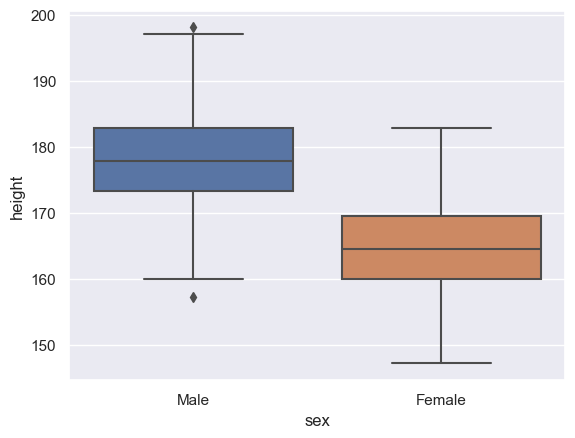

In [422]:
sns.boxplot(data=df, x="sex", y="height")

There is clearly a relationship between the height of a person and their sex in this dataset. The male average is almost the same as the female max, and the female min is much lower than the male min.

array([[<Axes: title={'center': 'x'}>]], dtype=object)

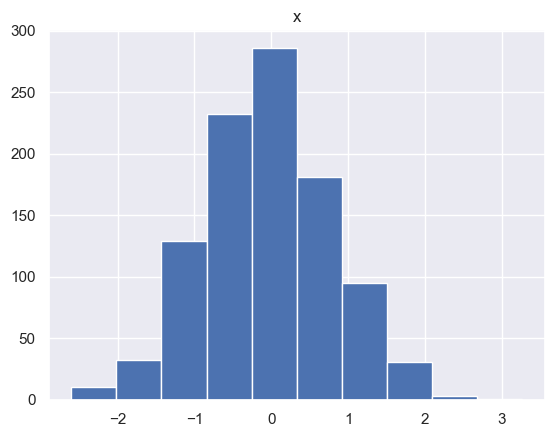

In [423]:
sampling_dist = []
for i in range(1000):
    df_new = pd.DataFrame({"sex": df["sex"].sample(487, replace=False)})
    df_new = df_new.reset_index()
    df_new["height"] = df["height"]
    sampling_dist.append(df_new[df_new["sex"] == "Male"]["height"].mean() - df_new[df_new["sex"] == "Female"]["height"].mean())
sampling_dist = pd.DataFrame({"x": sampling_dist})
sampling_dist.hist()

In [424]:
df_male = df[df["sex"] == "Male"]
df_male["height"].mean()

177.83392070484584

In [425]:
df_female = df[df["sex"] == "Female"]
df_female["height"].mean()

164.87230769230771

In [426]:
df_male["height"].mean() - df_female["height"].mean()

12.961613012538123

In [427]:
(sampling_dist["x"] >= 12.961613012538123).mean()

0.0

Because p < 0.05, we can reject our null hypothesis. We can reject our null hypothesis because the height of the average male is significantly higher than the height of the average female. From this, we can assume that in the population of people that our data reflects, the same results will be true.

## 5. Conclusion

#### **Summary**

Set 1: 
- Using a LASSO model, we found that the best variables to include in the model are knee_diameter, shoulder_girth, chest_girth, waist_girth, hip_girth, forearm_girth, knee_diameter, and calf_girth.

- Our R^2 value of our model was 0.948, so 94.8% of the variation is explained by our regression line. This is very high, which is very good. This means that our model has a large proportion of the variability in the dependent variable that has been accounted for by the model.

Set 2: 
- We can accurately predict a person's sex based on their body dimensions. The area under our ROC training curve was 99.5%, which is very high. This is very good as it tells us that our model is very efficient and good at distinguishing positives and negatives (the sexes). Our model is quite accurate.

- The accuracy rate of our model was 96.4%, the sensitivity rate was 98.8%, and the specificity was 94.4%.

Set 3: 
- We can see that there is a very strong relationship between the height of a person and their sex both in the data set and in the population. 

- Our null hypothesis was that the average height of males and females was the same, and because our p-value was less than 0.05, we are able to reject this null hypothesis. We can accurately answer our question and state that the average male in our dataset and in the population is greater than the average height of a female.

#### **Limitations**

We did not face any particular limitations with our data, however, some additional contextual information would be nice. Such information could be the units that this data is measured, and more variables regarding fitness, body fat percentage, or other measures of health. 

Additionally, we do not know what group of people this data was taken from. The group could be lacking in diversity, meaning that the data and our results would not be representative of all groups of people. We do not want to apply our results to groups that are not reflected in the data, so having the context of who our data reflects would be useful.

#### **Future Questions**

In the future, we would want to use this analysis as well as doing new analysis to see how obesity is impacted by different body dimensions. Asking questions such as how the average weight and body measurements have changed since the data was first taken would be important to understanding how these variables change over time. We may want to ask questions such as: has the mean weight changed, and if so, how?